In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Q31 アフィン変換(スキュー)
(1)アフィン変換を用いて、出力(1)のようなX-sharing(dx = 30)画像を作成せよ。

(2)アフィン変換を用いて、出力2のようなY-sharing(dy = 30)画像を作成せよ。

(3)アフィン変換を用いて、出力3のような幾何変換した(dx = 30, dy = 30)画像を作成せよ。

このような画像はスキュー画像と呼ばれ、画像を斜め方向に伸ばした画像である。

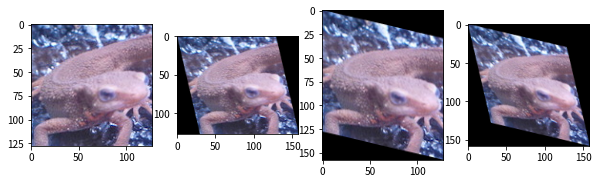

In [39]:
def skew_img(img,sx,sy):
    h,w,l = img.shape
    
    M = np.array([[1,sx/h,0],[sy/w,1,0]],dtype=np.float32)
    out = cv2.warpAffine(img,M,(w+sx,h+sy))
    return out

img = cv2.imread("imori.jpg")
sx = 30
sy = 30
result1 = skew_img(img,sx,0)
result2 = skew_img(img,0,sy)
result3 = skew_img(img,sx,sy)

plt.figure(facecolor="white",figsize=(10,3))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(result3, cv2.COLOR_BGR2RGB))
plt.show()

# Q32 フーリエ変換

二次元離散フーリエ変換(DFT)を実装し、imori.jpgをグレースケール化したものの周波数のパワースペクトルを表示せよ。 また、逆二次元離散フーリエ変換(IDFT)で画像を復元せよ。

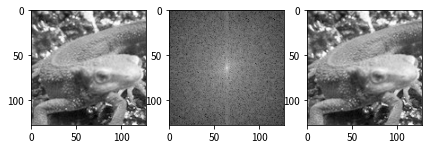

In [2]:
def gen_grayscale(img):
    green = img[:,:,0]
    blue = img[:,:,1]
    red = img[:,:,2]
    
    gray =  0.2126*red + 0.7152*green + 0.0722*blue
    
    gray = gray.astype(np.uint8)
    return gray

img = cv2.imread("imori.jpg")

img_gray = gen_grayscale(img)

# フーリエ変換
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# 逆フーリエ変換
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(facecolor="white",figsize=(7,3))
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(img_back,cmap="gray")

# Q33 フーリエ変換　ローパスフィルタ

imori.jpgをグレースケール化したものをDFTし、ローパスフィルタを通してIDFTで画像を復元せよ。

<ipython-input-18-05368e02e01c>:31: RuntimeWarning: divide by zero encountered in log
  masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))


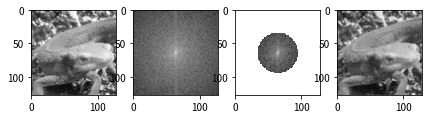

In [18]:
def low_pass_filter(img,r):
    """generate low pass filter
    Args:
    img : image array
    r : radius

    """
    size = img_gray.shape
    mask = np.zeros(size)
    length = size[0]
    centery = size[0]/2
    for x in range(0,length):
        for y in range(0,length):
            if (x- centery)**2 +(y- centery)**2 <r**2:
                mask[x,y]=1
    return mask

img = cv2.imread("imori.jpg")

img_gray = gen_grayscale(img)

# フーリエ変換
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# ローパスフィルタ
r =32
mask = low_pass_filter(img_gray,r)
masked_fshift = fshift*mask
masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))

# 逆フーリエ変換
f_ishift = np.fft.ifftshift(masked_fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(facecolor="white",figsize=(7,3))
plt.subplot(1,4,1)
plt.imshow(img_gray,cmap="gray")
plt.subplot(1,4,2)
plt.imshow(magnitude_spectrum,cmap="gray")
plt.subplot(1,4,3)
plt.imshow(masked_magnitude_spectrum,cmap="gray")
plt.subplot(1,4,4)
plt.imshow(img_back,cmap="gray")

# Q34 フーリエ変換　ハイパスフィルタ

imori.jpgをグレースケール化したものをDFTし、ハイパスフィルタを通してIDFTで画像を復元せよ。

<ipython-input-21-523d4d0952d2>:27: RuntimeWarning: divide by zero encountered in log
  masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))


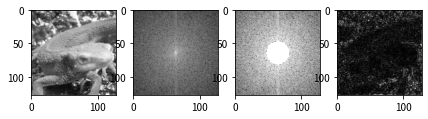

In [21]:
def high_pass_filter(img,r):
    """generate high pass filter
    Args:
    img : image array
    r : radius

    """
    size = img_gray.shape
    mask = np.zeros(size)
    length = size[0]
    centery = size[0]/2
    for x in range(0,length):
        for y in range(0,length):
            if (x- centery)**2 +(y- centery)**2 >r**2:
                mask[x,y]=1
    return mask

# フーリエ変換
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# ローパスフィルタ
r =16
mask = high_pass_filter(img_gray,r)
masked_fshift = fshift*mask
masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))

# 逆フーリエ変換
f_ishift = np.fft.ifftshift(masked_fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(facecolor="white",figsize=(7,3))
plt.subplot(1,4,1)
plt.imshow(img_gray,cmap="gray")
plt.subplot(1,4,2)
plt.imshow(magnitude_spectrum,cmap="gray")
plt.subplot(1,4,3)
plt.imshow(masked_magnitude_spectrum,cmap="gray")
plt.subplot(1,4,4)
plt.imshow(img_back,cmap="gray")